## Devasy Patel 
## 20BCE057
## Practical - 7
# DIPA

### Aim : To perform Fourier Transform on an image and apply low pass filter to it.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Demonstartion of the Fourier Transform and applying low pass filter to an array

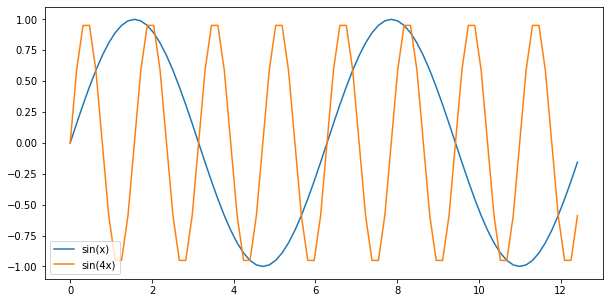

In [2]:
# array from 0 to 4 pi with every interval at pi/20
x = np.arange(0, 4*np.pi, np.pi/20)

y1 = np.sin(x)
y2 = np.sin(4*x)


plot = plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='sin(4x)')
plt.legend()
plt.show()

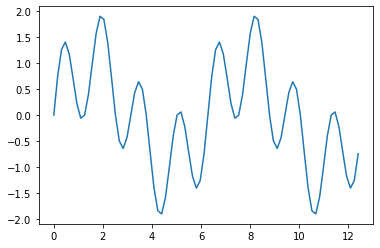

In [3]:
y = y1+ y2

plt.plot(x, y, label='sin(x) + sin(4x)')

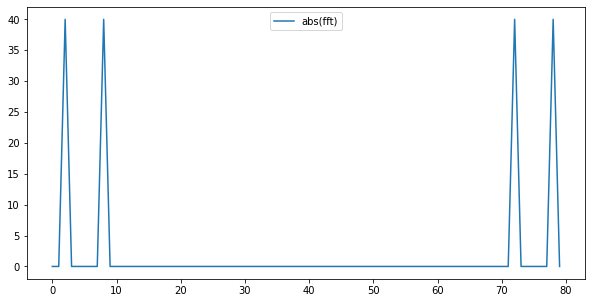

In [4]:
# get fft of y

fft = np.fft.fft(y)

plot = plt.figure(figsize=(10, 5))

# plot abs of fft
abs_fft = np.abs(fft)
plt.plot(np.abs(fft), label='abs(fft)')
plt.legend()
plt.show()


In [5]:
# apply low pass filter such that only sin(x) is left


filter = np.zeros(len(fft))
hfilter = np.zeros(len(fft))
filter[0:5] = 1
filter[-5:] = 1
hfilter[6:-5] = 1

# apply filter
filtered_fft = fft * filter
hfiltered_fft = fft * hfilter

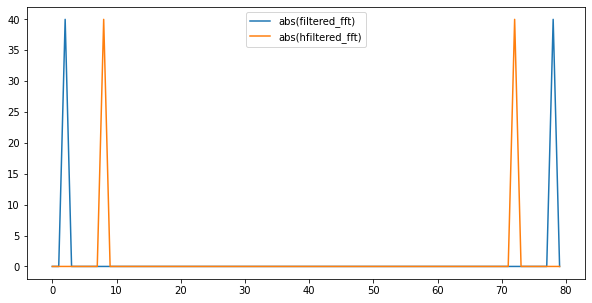

In [6]:
plot = plt.figure(figsize=(10, 5))
plt.plot(np.abs(filtered_fft), label='abs(filtered_fft)')
plt.plot(np.abs(hfiltered_fft), label='abs(hfiltered_fft)')
plt.legend()
plt.show()

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


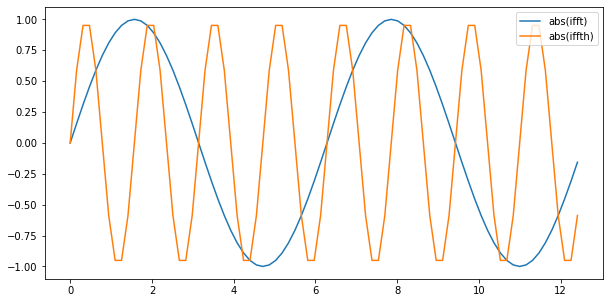

In [7]:
# get ifft of filtered fft
ifft = np.fft.ifft(filtered_fft)
iffth = np.fft.ifft(hfiltered_fft)

plot = plt.figure(figsize=(10, 5))
plt.plot(x, ifft, label='abs(ifft)')
plt.plot(x, iffth, label='abs(iffth)')
plt.legend()
plt.show()

# Now begining with part 2: Fourier Transform on an image, and applying a low pass filter to it

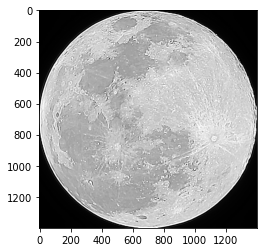

In [8]:
import cv2
image = cv2.imread('moon_out2.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('image2.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
image = np.array(image, dtype=np.float32)

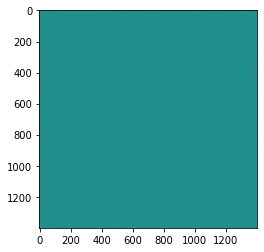

In [9]:
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x][y] = image[x][y] * (-1)**(x+y)


plt.imshow((image))


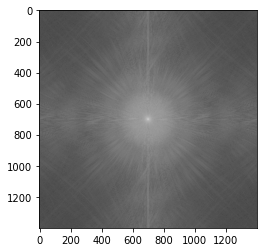

In [10]:
Fourier = np.fft.fft2(image)
plt.imshow(np.log(np.abs(Fourier)), cmap='gray')

In [11]:
img_filter = np.zeros(Fourier.shape)
n = Fourier.shape[0]
m = Fourier.shape[1]
for x in range(img_filter.shape[0]):
    for y in range(img_filter.shape[1]):
        if np.sqrt((n/2 - x)**2 + (m/2 - y)**2) < 15:
            img_filter[x][y] = 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_2376\1766302989.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(filtered_img)))


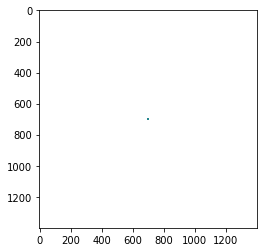

In [12]:
filtered_img = (Fourier *  img_filter)
plt.imshow(np.log(np.abs(filtered_img)))

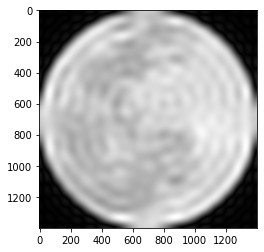

In [13]:
ifft = np.fft.ifft2(filtered_img)
# plt.imshow(np.log(np.abs(ifft)), cmap='gray')
plt.imshow(np.abs(ifft), cmap='gray')


In [14]:
# display inverse fourier transform with filtered scale from 15 to 500
def display_inverse_fourier_transform(image, filtersize):
    Fourier = np.fft.fft2(image)
    img_filter = np.zeros(Fourier.shape)
    n = Fourier.shape[0]
    m = Fourier.shape[1]
    for x in range(img_filter.shape[0]):
        for y in range(img_filter.shape[1]):
            if np.sqrt((n/2 - x)**2 + (m/2 - y)**2) < filtersize:
                img_filter[x][y] = 1

    filtered_img = (Fourier *  img_filter)
    ifft = np.fft.ifft2(filtered_img)
    return ifft



# High-pass filter: removes low frequency components from an image

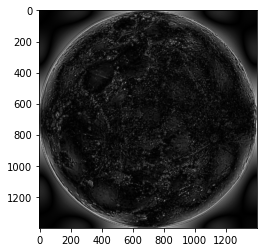

In [16]:
image = cv2.imread('moon_out2.jpg', cv2.IMREAD_GRAYSCALE)
image = np.array(image, dtype=np.float32)

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x][y] = image[x][y] * (-1)**(x+y)
        
Fourier = np.fft.fft2(image)
plt.imshow(np.log(np.abs(Fourier)), cmap='gray')

img_filter = np.zeros(Fourier.shape)
n = Fourier.shape[0]
m = Fourier.shape[1]
for x in range(img_filter.shape[0]):
    for y in range(img_filter.shape[1]):
        if np.sqrt((n/2 - x)**2 + (m/2 - y)**2) > 5:
            img_filter[x][y] = 1
            
filtered_img = (Fourier *  img_filter)

ifft = np.fft.ifft2(filtered_img)

plt.imshow(np.abs(ifft), cmap='gray')


# Butterworth High pass filter, without inbuilt function
H(u, v) = 1/(1 + (D0/D(u, v))^(2*n))

![Alt text](image.png)

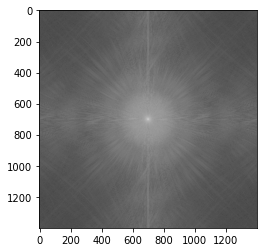

In [17]:
# D0 = 5
image = cv2.imread('moon_out2.jpg', cv2.IMREAD_GRAYSCALE)
image = np.array(image, dtype=np.float32)

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x][y] = image[x][y] * (-1)**(x+y)
        
Fourier = np.fft.fft2(image)
plt.imshow(np.log(np.abs(Fourier)), cmap='gray')

In [18]:
# apply filter, butterworth filter H(u, v) = 1/(1 + (D0/D(u, v))^(2*n))
D0 = 5
nval = 1
img_filter = np.zeros(Fourier.shape)
n = Fourier.shape[0]
m = Fourier.shape[1]
for x in range(img_filter.shape[0]):
    for y in range(img_filter.shape[1]):
        denom = 1+(D0 / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval)
        img_filter[x][y] = 1 / denom


C:\Users\Owner\AppData\Local\Temp\ipykernel_2376\2007570319.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  denom = 1+(D0 / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval)


Text(0.5, 1.0, 'Filter')

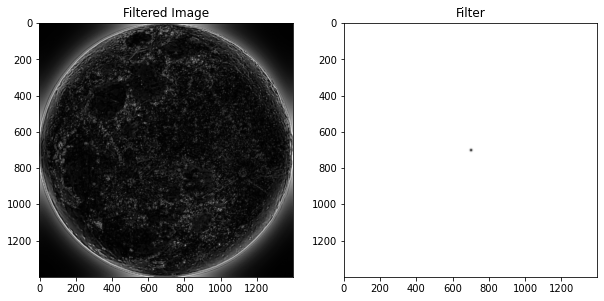

In [39]:
filtered_img = (Fourier *  img_filter)

ifft = np.fft.ifft2(filtered_img)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(np.abs(ifft), cmap='gray')
ax[0].set_title('Filtered Image')
ax[1].imshow(image_filter, cmap='gray')
ax[1].set_title('Filter')


C:\Users\Owner\AppData\Local\Temp\ipykernel_2376\985917342.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  denom = 1+(D0[i] / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval[j])


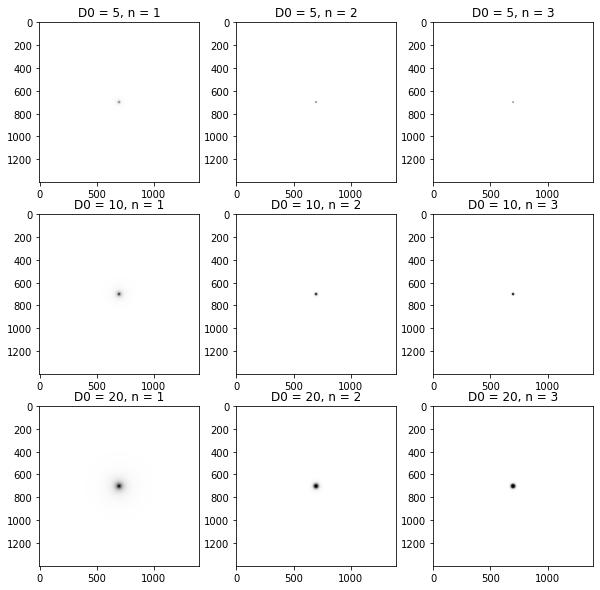

In [40]:
# plot butterworth filter for different values of D0 and n
# D0 from 5, 10, 20
# n from 1, 2, 3
D0 = [5, 10, 20]
nval = [1, 2, 3]
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        img_filter = np.zeros(Fourier.shape)
        n = Fourier.shape[0]
        m = Fourier.shape[1]
        for x in range(img_filter.shape[0]):
            for y in range(img_filter.shape[1]):
                denom = 1+(D0[i] / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval[j])
                img_filter[x][y] = 1 / denom
        ax[i][j].imshow(img_filter, cmap='gray')
        ax[i][j].set_title('D0 = {}, n = {}'.format(D0[i], nval[j]))

In [51]:
# now apply filter to image
image = cv2.imread('HPF-image.png', cv2.IMREAD_GRAYSCALE)
image = np.array(image, dtype=np.float32)
 
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        image[x][y] = image[x][y] * (-1)**(x+y)
        
Fourier = np.fft.fft2(image)



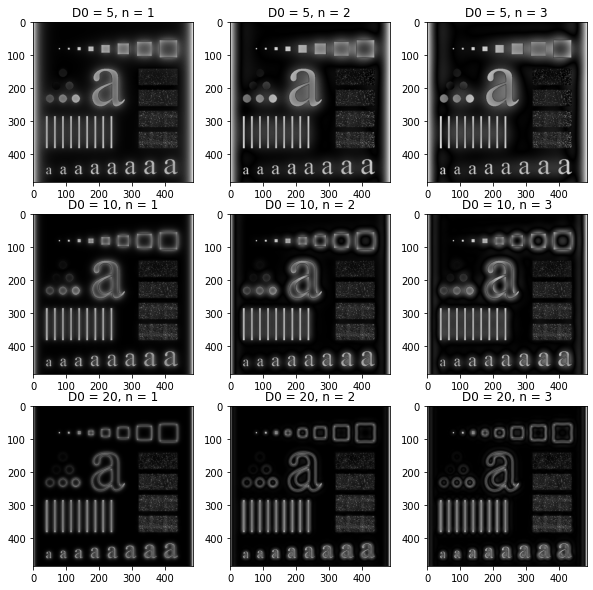

In [52]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        img_filter = np.zeros(Fourier.shape)
        n = Fourier.shape[0]
        m = Fourier.shape[1]
        for x in range(img_filter.shape[0]):
            for y in range(img_filter.shape[1]):
                denom = 1+(D0[i] / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval[j])
                img_filter[x][y] = 1 / denom
                
        filtered_img = (Fourier *  img_filter)
        ifft = np.fft.ifft2(filtered_img)
        ax[i][j].imshow(np.abs(ifft), cmap='gray')
        ax[i][j].set_title('D0 = {}, n = {}'.format(D0[i], nval[j]))
        

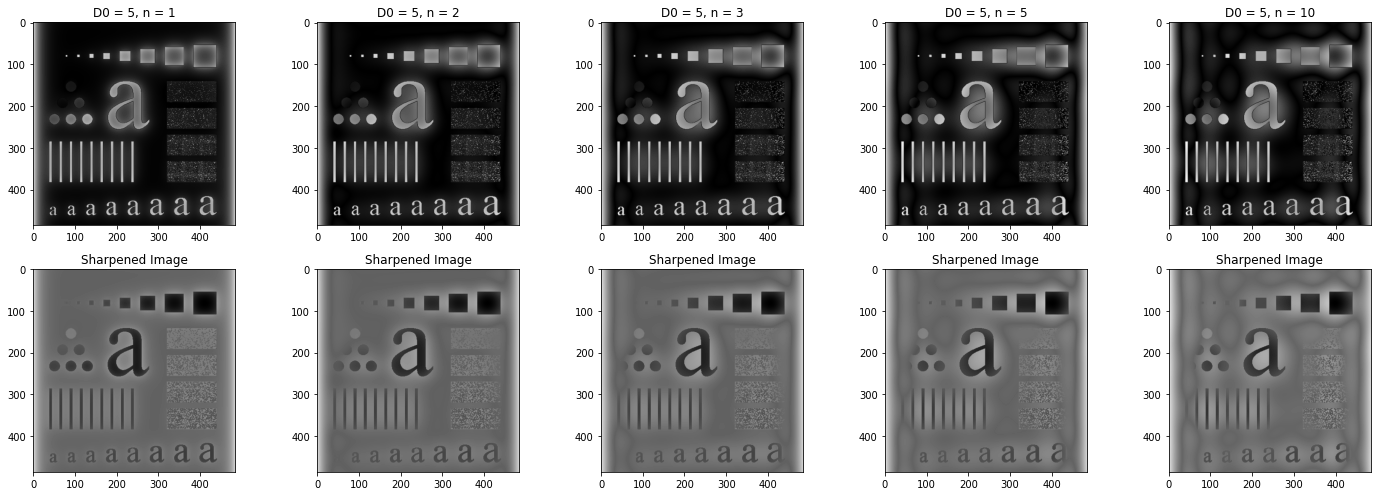

In [53]:
# plot sharpened image and filtered image for different values of n with d0 =5
# n from 1, 2, 3
org = cv2.imread('HPF-image.png', cv2.IMREAD_GRAYSCALE)
org = np.array(org, dtype=np.float32)

fig, ax = plt.subplots(2, 5, figsize=(20, 7))
nval = [1, 2, 3, 5, 10]
for i in range(len(nval)):
    img_filter = np.zeros(Fourier.shape)
    n = Fourier.shape[0]
    m = Fourier.shape[1]
    for x in range(img_filter.shape[0]):
        for y in range(img_filter.shape[1]):
            denom = 1+(D0[0] / np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**(2*nval[i])
            img_filter[x][y] = 1 / denom
                
    filtered_img = (Fourier *  img_filter)
    ifft = np.fft.ifft2(filtered_img)
    ax[0][i].imshow(np.abs(ifft), cmap='gray')
    ax[0][i].set_title('D0 = {}, n = {}'.format(D0[0], nval[i]))
    ax[1][i].imshow( org+np.abs(ifft), cmap='gray')
    ax[1][i].set_title('Sharpened Image')
 
fig.tight_layout()

# Gaussian High pass filter, without inbuilt function
![Alt text](image-1.png)


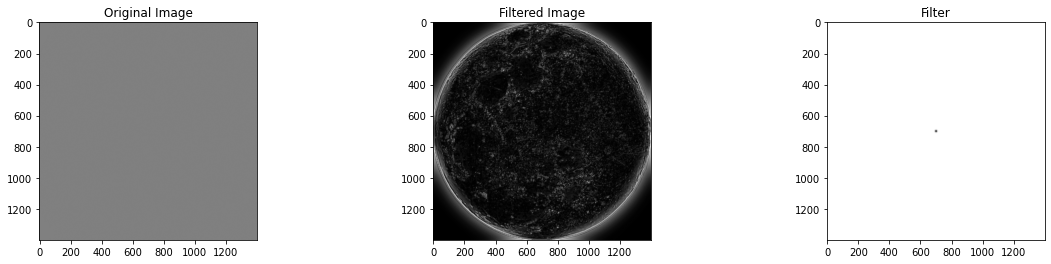

<Figure size 432x288 with 0 Axes>

In [29]:
# H(u, v) = 1 - e^(-D(u, v)^2 / 2 * D0^2)

D0 = 5
nval = 1
image_filter = np.zeros(Fourier.shape)
n = Fourier.shape[0]
m = Fourier.shape[1]
for x in range(image_filter.shape[0]):
    for y in range(image_filter.shape[1]):
        denom = 1 - np.exp(-((np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**2) / (2 * D0**2))
        image_filter[x][y] = denom

filtered_img = (Fourier *  image_filter)
ifft = np.fft.ifft2(filtered_img)

# plot original image, filtered image, filter and inverse fourier transform
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(np.abs(ifft), cmap='gray')
axs[1].set_title('Filtered Image')
axs[2].imshow(np.abs(image_filter), cmap='gray')
axs[2].set_title('Filter')
# axs[3].imshow(np.log(np.abs(filtered_img)), cmap='gray')
# axs[3].set_title('Inverse Fourier Transform')
plt.show()
plt.tight_layout()



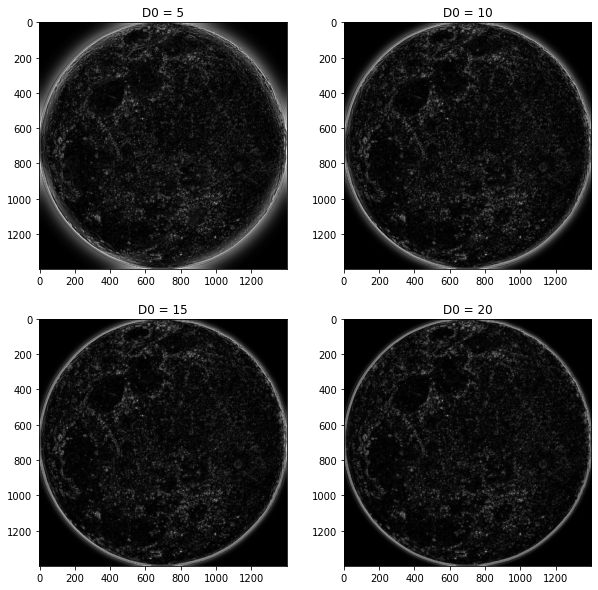

In [25]:
# plot images with different D0 values for gaussian HP filter
fix, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        D0 = 5 + 10*i + 5*j
        image_filter = np.zeros(Fourier.shape)
        n = Fourier.shape[0]
        m = Fourier.shape[1]
        for x in range(image_filter.shape[0]):
            for y in range(image_filter.shape[1]):
                denom = 1 - np.exp(-((np.sqrt((n/2 - x)**2 + (m/2 - y)**2))**2) / (2 * D0**2))
                image_filter[x][y] = denom
        filtered_img = (Fourier *  image_filter)
        ifft = np.fft.ifft2(filtered_img)
        ax[i][j].imshow(np.abs(ifft), cmap='gray')
        ax[i][j].set_title('D0 = ' + str(D0))
plt.tight_layout()

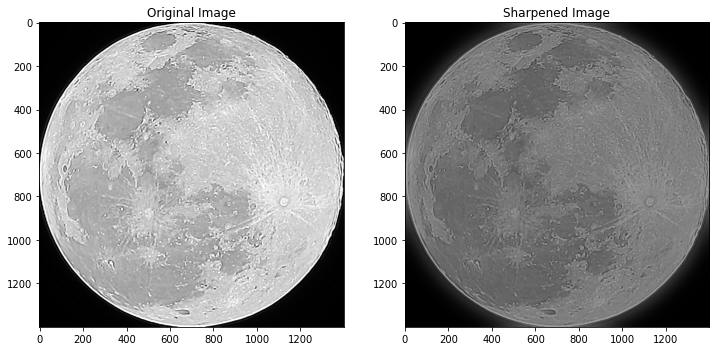

<Figure size 432x288 with 0 Axes>

In [35]:
# add filtered image to original image to get sharpened image
image = cv2.imread('moon_out2.jpg', cv2.IMREAD_GRAYSCALE)
image = np.array(image, dtype=np.float32)
sharpened_image = image + ifft

# plot larger image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(np.abs(sharpened_image), cmap='gray')
axs[1].set_title('Sharpened Image')
plt.show()
plt.tight_layout()

 # Conclusion

In this practical, we successfully implemented image enhancement using frequency domain filters - specifically, Ideal, Butterworth, and Gaussian filters, both lowpass and highpass. 

The Ideal filters provided a basic, binary approach to frequency filtering, effectively separating the high and low frequencies. However, they introduced artifacts due to the abrupt cutoff.

The Butterworth filters, with their smooth transition, reduced these artifacts while still providing a good separation of high and low frequencies. The degree of smoothness could be adjusted, providing a level of control over the trade-off between frequency separation and artifact reduction.

The Gaussian filters, due to their inherent nature, provided the smoothest transition between frequency components and resulted in the least amount of artifacts. Both lowpass and highpass Gaussian filters were effective in image enhancement tasks.

Overall, the use of these frequency domain filters significantly enhanced the quality of images by emphasizing certain frequency components and suppressing others. The choice of filter and its type (lowpass or highpass) depends on the specific requirements of the image enhancement task.